In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('train.csv')

In [12]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [13]:
# df.head()

# df.info()

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: >

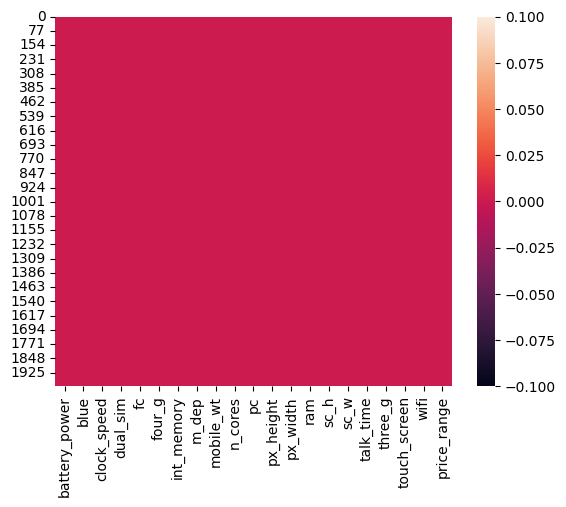

In [14]:
sns.heatmap(df.isnull())

In [15]:
# features = ['n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
features_df = df.drop('price_range', axis=1)
features = features_df.columns.tolist()
x = df[features]
y = df['price_range']

x.shape, y.shape

((2000, 20), (2000,))

In [16]:
# Split data into training and testing

from sklearn.model_selection import train_test_split

x_train, X_test, y_train, y_test = train_test_split(x, y, random_state=70)
y_test.shape

(500,)

In [17]:

# Making SVM Model

from sklearn.svm import SVC
# Create a SVC object
svm = SVC(probability=True, random_state=0)


svm.fit(x_train, y_train)
pred = svm.predict(X_test)

print(pred)

[0 3 0 3 1 2 1 1 3 1 2 0 2 1 1 1 1 0 3 1 0 0 0 0 0 3 2 3 0 0 0 1 2 1 3 1 0
 0 2 0 3 1 2 0 2 2 2 2 3 1 2 1 2 3 2 0 1 0 3 1 1 2 2 1 1 3 1 3 2 2 3 3 0 2
 0 0 0 2 1 2 0 2 1 2 2 2 1 2 3 1 1 2 1 1 2 1 0 0 2 3 2 2 1 3 1 0 1 2 3 0 0
 2 0 2 2 0 2 2 2 2 2 3 1 0 0 2 3 1 0 3 3 1 3 2 3 2 3 2 2 1 3 0 3 1 3 0 1 1
 2 1 1 2 2 2 3 3 0 3 2 1 1 0 0 3 0 0 1 1 1 3 1 2 3 0 1 3 0 0 0 0 1 3 2 0 0
 3 3 2 2 2 2 0 2 0 2 1 1 1 3 1 3 1 0 1 3 0 2 3 2 1 3 0 1 1 3 1 0 3 2 3 1 2
 0 2 1 2 3 1 0 0 3 2 3 3 1 2 1 1 1 3 0 2 3 0 2 0 3 0 3 3 0 1 0 3 3 1 0 1 2
 1 3 3 2 0 1 0 3 1 0 2 3 2 2 0 2 1 0 1 2 1 1 3 3 1 3 1 0 0 1 0 2 0 0 2 2 2
 2 3 3 1 0 3 2 1 3 2 0 3 2 0 3 0 0 3 1 2 3 2 1 1 0 2 3 1 3 0 0 2 0 0 0 3 1
 0 3 2 3 3 3 0 3 0 0 0 3 2 2 3 2 3 0 3 0 1 2 2 0 0 3 0 3 3 2 0 3 3 3 0 1 3
 1 0 0 2 2 2 0 1 0 1 2 1 1 1 0 1 1 2 3 3 0 1 2 1 2 2 3 3 3 3 1 0 0 3 0 0 3
 3 3 0 1 1 2 1 2 3 2 3 1 1 3 0 3 0 3 0 1 2 0 2 3 2 2 0 1 3 0 3 0 0 2 3 1 1
 1 2 0 3 3 0 2 1 3 3 3 2 3 3 1 3 1 2 1 2 0 0 3 2 0 2 3 1 1 0 1 1 0 0 1 2 1
 0 1 3 3 0 3 0 0 2 2 2 1 

In [18]:
# Model accuration
score = svm.score(X_test, y_test)
print(score)

0.95


In [19]:
# Membuat inputan model regresi linier
# ['n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
# input_data = np.array([[1, 0, 0, 0, 0, 1, 1]])

# prediction = svm.predict(input_data)
# print('Estimasi berdasarkan prediksi : ', prediction)

In [20]:
# Keeping the model on pickle

import pickle

filename = 'predict_model.sav'
pickle.dump(svm, open(filename, 'wb'))